In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


In [4]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [5]:
X_train,X_test=X_train/255,X_test/255

In [7]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [25]:
def plot_sample(X,Y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(X[index])
  plt.xlabel(Y[index])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


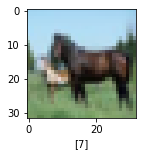

In [27]:
plot_sample(X_train,Y_train,12)

In [11]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f009f87d6d0>>

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [16]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5094 - accuracy: 0.4474 - val_loss: 1.2568 - val_accuracy: 0.5405
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1377 - accuracy: 0.5965 - val_loss: 1.0487 - val_accuracy: 0.6252
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9775 - accuracy: 0.6577 - val_loss: 0.9546 - val_accuracy: 0.6634
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8772 - accuracy: 0.6931 - val_loss: 0.9138 - val_accuracy: 0.6857
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8035 - accuracy: 0.7178 - val_loss: 0.8933 - val_accuracy: 0.6854
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7418 - accuracy: 0.7397 - val_loss: 0.8499 - val_accuracy: 0.7079
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6961 - accuracy: 0.7555 - val_loss: 0.8499 -

In [21]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.8727 - accuracy: 0.7220


[0.8727394342422485, 0.722000002861023]

In [17]:
Y_predict=model.predict(X_test)

In [18]:
Y_classes=[np.argmax(element) for element in Y_predict]
print("classification report:\n",classification_report(Y_test,Y_classes))

classification report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      1000
           1       0.78      0.89      0.83      1000
           2       0.66      0.55      0.60      1000
           3       0.66      0.42      0.51      1000
           4       0.66      0.68      0.67      1000
           5       0.67      0.59      0.63      1000
           6       0.75      0.82      0.78      1000
           7       0.67      0.83      0.74      1000
           8       0.87      0.80      0.83      1000
           9       0.78      0.83      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



313/313 - 3s - loss: 0.8727 - accuracy: 0.7220 - 3s/epoch - 10ms/step


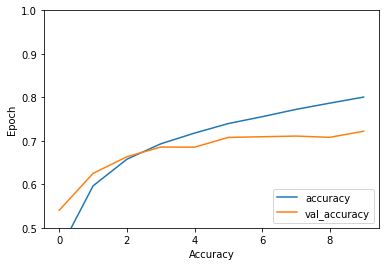

In [22]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss,test_acc=model.evaluate(X_test,Y_test,verbose=2)

In [20]:
print(test_acc)

0.722000002861023
